# Installing InstaLoader & Authentication

In [1]:
!pip install instaloader

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import datetime
# import emoji
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [3]:
# Create an instance of Instaloader class
loader = instaloader.Instaloader()

# Enter your Instagram handle and password
ACCOUNT = 'ilovesmt203'
PASSWORD = 'ilovesmt203!haha'

# Upon successful authentication, you should see a message saying Authentication OK.
# Otherwise, check your login details
try:
    loader.login(ACCOUNT, PASSWORD)
    print("Authentication OK")
except:
    print("Error during authentication")
    
# customise the parameter settings based on your download preference
# configuration 
loader = instaloader.Instaloader(download_pictures=False,
                            download_video_thumbnails=False,
                            download_videos=False,
                            download_comments=True,
                            download_geotags=True,
                            compress_json=False,
                            post_metadata_txt_pattern="")

NameError: name 'instaloader' is not defined

# Downloading Posts as JSON files

In [18]:
HASHTAG = "impeachtrump"

# Create a Hashtag instance from a given hashtag name
hashtag = instaloader.Hashtag.from_name(loader.context, HASHTAG)
loaded_posts = hashtag.get_all_posts()

for cnt_post, post in enumerate(loaded_posts):
    # date_created = datetime.datetime.fromtimestamp(post.date_utc)
    if datetime.datetime(2021,1,6) <= post.date_local <= datetime.datetime(2021,2,13):
        try:
            loader.download_post(post, target='#'+hashtag.name)
        except:
            print("\nError in downloading. Process halted.")



HTTP redirect from https://www.instagram.com/explore/tags/impeachtrump/ to https://www.instagram.com/accounts/login/


LoginRequiredException: Redirected to login page. Use --login.

In [53]:
mypath = "."
folder_name = '#impeachtrump'

json_path = f'{mypath}/{folder_name}'
json_path

'./#impeachtrump'

# Extracting Individual Post Information

In [54]:
def convert_json_posts_to_df(json_path):
    substring = "comment"
    json_files = [filename for filename in os.listdir(json_path) if (filename.endswith('.json') and substring not in filename)]
    post_list = []

    # iterate through the list of JSON files
    for js in json_files:
            
        # open and read each json file
        with open(os.path.join(json_path, js)) as json_file:
            json_text = json.load(json_file)
            #pprint.pprint(json.text)
            
            try:
                # extract Instagram post information
                comment_id = json_text['node']['id']
                user_id = json_text['node']['owner']['id']
                unix_timestamp = json_text['node']['taken_at_timestamp']
                date_time = datetime.datetime.fromtimestamp(unix_timestamp)
                likes_count = json_text['node']['edge_liked_by']['count']
                
                try:
                    comment_raw = json_text['node']['accessibility_caption']
                except:
                    pass
            except:
                pass
        
        post_list.append([comment_id, user_id, date_time, likes_count, comment_raw])
    df = pd.DataFrame(data=post_list, columns=['comment_id', 'user_id', 'date_time', 'likes_count', 'comment_raw'])
    return df

In [55]:
import json
import datetime
import pandas as pd

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)

df1 = convert_json_posts_to_df(json_path)
df1.insert(2, 'platform', 'instagram')
df1

,comment_id,user_id,platform,date_time,likes_count,comment_raw
0,2485115361140092383,3096242645,instagram,2021-01-13 00:27:38,569,Photo by brett kaufman in USA with @kathygriff...
1,2486144107417564404,45076909461,instagram,2021-01-14 10:31:34,43,None
2,2493835123373749797,7302369111,instagram,2021-01-25 01:12:15,5,"Photo by Joseph Saiz in Casa Grande, Arizona. ..."
3,2497089249940873219,289471423,instagram,2021-01-29 12:57:37,313,Photo by @bestdressking in 5 Star Restaurant. ...
4,2497394413521987156,45132302678,instagram,2021-01-29 23:03:55,37,"Photo by 🅰🅽·🅾🆃🅷·🅴🆁 ˈ🅻🅴🆅ə🅻 on January 29, 2021...."
5,2499509349740646973,47034870,instagram,2021-02-01 21:05:55,25,Photo shared by Marcie Farazyna on February 01...
6,2505059487094919878,42105487209,instagram,2021-02-09 12:53:03,6,Photo by The Political Student Page on Februar...
7,2505198552669696589,889937049,instagram,2021-02-09 17:29:21,0,"Photo by Le Nuage on February 09, 2021."
8,2505549950776082866,45686809407,instagram,2021-02-10 05:07:31,7,"Photo by Kelsey D. in Chicago, Illinois. May b..."
9,2505652995237250021,42105487209,instagram,2021-02-10 08:32:15,12,Photo by The Political Student Page on Februar...


In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   comment_id   285 non-null    object        
 1   user_id      285 non-null    object        
 2   platform     285 non-null    object        
 3   date_time    285 non-null    datetime64[ns]
 4   likes_count  285 non-null    int64         
 5   comment_raw  225 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 13.5+ KB


# Extracting Comments from each Post

In [56]:
 def convert_comments_posts_to_df(json_path):
    substring = "comment"
    json_files = [filename for filename in os.listdir(json_path) if (filename.endswith('.json') and substring in filename)]
    post_list = []

    # iterate through the list of JSON files
    for js in json_files:
            
        # open and read each json file
        with open(os.path.join(json_path, js)) as json_file:
            json_text = json.load(json_file)
            #pprint.pprint(json.text)
            
            #extract comments from comments.json files
            for comment in json_text:
                comment_id = comment['id']
                user_id = comment['owner']['id']
                date_time = datetime.datetime.fromtimestamp(comment['created_at'])
                likes_count = comment['likes_count']
                comment_raw = comment['text']
                
                post_list.append([comment_id, user_id, date_time, likes_count, comment_raw])

    df = pd.DataFrame(data=post_list, columns=['comment_id', 'user_id', 'date_time', 'likes_count', 'comment_raw'])
    return df

In [57]:
import json
import datetime
import pandas as pd

# pd.set_option('display.max_colwidth', -1)
# pd.set_option('display.max_rows', None)

df2 = convert_comments_posts_to_df(json_path)
df2.insert(2, 'platform', 'instagram')
df2.head()

,comment_id,user_id,platform,date_time,likes_count,comment_raw
0,17916024808583798,3544668418,instagram,2021-02-19 00:52:00,1,Well stated!
1,17874135509220349,30746756357,instagram,2021-02-16 01:55:25,1,😂😂👏
2,17891163556905576,10563354725,instagram,2021-02-12 00:05:16,1,The hand makes it sublime
3,18126510583195827,10563354725,instagram,2021-02-12 00:04:00,1,Missed this one b4 and the band aid too. Too good
4,17912957488603721,9704226,instagram,2021-02-03 22:33:08,1,😜😜😜perfect❣️


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   comment_id   292 non-null    int64         
 1   user_id      292 non-null    object        
 2   platform     292 non-null    object        
 3   date_time    292 non-null    datetime64[ns]
 4   likes_count  292 non-null    int64         
 5   comment_raw  292 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 13.8+ KB


In [58]:
frames = [df1, df2]
combined = pd.concat(frames)
combined.dropna(inplace=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   comment_id   491 non-null    object        
 1   user_id      491 non-null    object        
 2   platform     491 non-null    object        
 3   date_time    491 non-null    datetime64[ns]
 4   likes_count  491 non-null    int64         
 5   comment_raw  491 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 26.9+ KB


In [59]:
df = combined[combined['comment_raw'].str.startswith("Photo by")==False]
combined2 = df[df['comment_raw'].str.startswith("Photo shared by")==False]
combined2.head()

# df.to_csv('trump_impeachment_comments.csv')

,comment_id,user_id,platform,date_time,likes_count,comment_raw
0,17916024808583798,3544668418,instagram,2021-02-19 00:52:00,1,Well stated!
1,17874135509220349,30746756357,instagram,2021-02-16 01:55:25,1,😂😂👏
2,17891163556905576,10563354725,instagram,2021-02-12 00:05:16,1,The hand makes it sublime
3,18126510583195827,10563354725,instagram,2021-02-12 00:04:00,1,Missed this one b4 and the band aid too. Too good
4,17912957488603721,9704226,instagram,2021-02-03 22:33:08,1,😜😜😜perfect❣️


## Merging DataFrames from both hashtags

In [68]:
frames = [combined1, combined2]
combined = pd.concat(frames)
combined.dropna(inplace=True)
combined.info()

combined.to_csv('combined_instagram_comments.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 472
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   comment_id   767 non-null    object        
 1   user_id      767 non-null    object        
 2   platform     767 non-null    object        
 3   date_time    767 non-null    datetime64[ns]
 4   likes_count  767 non-null    int64         
 5   comment_raw  767 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 41.9+ KB


# Text Pre-processing

In [62]:
stopwords_list = stopwords.words('english')
stopwords_list += ['donald','trump', 'impeachment', 'february', 'one', ] #additional stopwords customised based on context 

In [82]:
comment_cleaned_emoji_list = []
comment_cleaned_no_emoji_list = []
comment_processed = []

for text in combined['comment_raw']: 
    text = re.sub(r"(?:\@|\#|https?\://)\S+", "", str(text)) # remove hashtag mentions and urls
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE) 
    text_no_emoji = emoji_pattern.sub(r'', str(text)) # remove emojis
    text_tokenised = word_tokenize(text)
    text_lower = [w.lower() for w in text_tokenised]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_stopremoved = [w for w in text_words_only if w not in stopwords_list]

    # stemmer = PorterStemmer()
    # text_stemmed = [stemmer.stem(w) for w in text_stopremoved]
    # output.append(text_stemmed)

    comment_cleaned_emoji_list.append(text)
    comment_cleaned_no_emoji_list.append(text_no_emoji)
    comment_processed.append(text_stopremoved)

In [83]:
#Create new columns
combined['comment_cleaned_emoji'] = comment_cleaned_emoji_list #to be used for vader analysis (no stopwords removed, but with emojis)
combined['comment_cleaned_no_emoji'] = comment_cleaned_no_emoji_list #to be used for vader analysis (no stopwords removed, but with emojis)
combined['comment_processed'] = comment_processed #to be used for wordcloud (stopwords removed)

combined.head()

,comment_id,user_id,platform,date_time,likes_count,comment_raw,comment_cleaned_emoji,comment_cleaned_no_emoji,comment_processed,vader_score_emoji,vader_score_no_emoji
0,2481702515306198095,4028120102,instagram,2021-01-08 07:26:55,2429,These recent events are just a reminder of how...,These recent events are just a reminder of how...,These recent events are just a reminder of how...,"[recent, events, reminder, senseless, racism, ...",0.1179,0.1179
140,2506215796907085585,44212179522,instagram,2021-02-11 03:10:26,12,Male standing in front of a wall wearing a bla...,Male standing in front of a wall wearing a bla...,Male standing in front of a wall wearing a bla...,"[male, standing, front, wall, wearing, black, ...",0.0000,0.0000
0,17966998288364376,33597388,instagram,2021-02-13 22:54:15,0,Yeah all the black people attacking and murder...,Yeah all the black people attacking and murder...,Yeah all the black people attacking and murder...,"[yeah, black, people, attacking, murdering, ha...",-0.9349,-0.9349
1,17885746028017595,2299592476,instagram,2021-02-13 09:13:03,0,Are you referring to what is happening on the ...,Are you referring to what is happening on the ...,Are you referring to what is happening on the ...,"[referring, happening, nyc, subway]",0.0000,0.0000
2,17842696493521935,1651100777,instagram,2021-01-22 12:51:37,0,🙌,🙌,,[],0.0000,0.0000


# Word Clouds

In [84]:
wordcloud_words = []
for wordlist in combined['comment_processed']:
    for word in wordlist:
        wordcloud_words.append(str(word))

# print(wordcloud_words)

In [85]:
wordcloud_string = ""
for word in wordcloud_words:
    wordcloud_string += word+" "

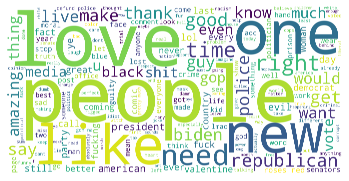

In [90]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stopwords_list, background_color="white", width=10000, height=5000).generate(wordcloud_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("impeachtrump.png")

# Sentiment Analysis
## VADER Analysis (better for short texts)

In [88]:
def vader_compound_score(sentence): 
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence) 
    return sentiment_dict['compound']

combined['vader_score_emoji'] = combined['comment_cleaned_emoji'].apply(vader_compound_score) 
combined['vader_score_no_emoji'] = combined['comment_cleaned_no_emoji'].apply(vader_compound_score) 
combined

,comment_id,user_id,platform,date_time,likes_count,comment_raw,comment_cleaned_emoji,comment_cleaned_no_emoji,comment_processed,vader_score_emoji,vader_score_no_emoji
0,2481702515306198095,4028120102,instagram,2021-01-08 07:26:55,2429,These recent events are just a reminder of how...,These recent events are just a reminder of how...,These recent events are just a reminder of how...,"[recent, events, reminder, senseless, racism, ...",0.1179,0.1179
140,2506215796907085585,44212179522,instagram,2021-02-11 03:10:26,12,Male standing in front of a wall wearing a bla...,Male standing in front of a wall wearing a bla...,Male standing in front of a wall wearing a bla...,"[male, standing, front, wall, wearing, black, ...",0.0000,0.0000
0,17966998288364376,33597388,instagram,2021-02-13 22:54:15,0,Yeah all the black people attacking and murder...,Yeah all the black people attacking and murder...,Yeah all the black people attacking and murder...,"[yeah, black, people, attacking, murdering, ha...",-0.9349,-0.9349
1,17885746028017595,2299592476,instagram,2021-02-13 09:13:03,0,Are you referring to what is happening on the ...,Are you referring to what is happening on the ...,Are you referring to what is happening on the ...,"[referring, happening, nyc, subway]",0.0000,0.0000
2,17842696493521935,1651100777,instagram,2021-01-22 12:51:37,0,🙌,🙌,,[],0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
468,17960093614381331,11231348569,instagram,2021-02-12 03:35:26,0,BAAAHHAHAHA!,BAAAHHAHAHA!,BAAAHHAHAHA!,[baaahhahaha],0.0000,0.0000
469,17904287911681262,2425455513,instagram,2021-02-12 06:50:57,1,💀,💀,,[],0.0000,0.0000
470,17929289107491050,21774626655,instagram,2021-02-12 05:59:25,0,This is literally Candace Owen making fun of AOC.,This is literally Candace Owen making fun of AOC.,This is literally Candace Owen making fun of AOC.,"[literally, candace, owen, making, fun, aoc]",0.5106,0.5106
471,17948465932422779,37735423346,instagram,2021-02-14 13:13:46,0,#impeachtrump #gorillagluegirl #senate #covid ...,,,[],0.0000,0.0000


In [93]:
combined.to_csv('instagram_comments_cleaned.csv')

(array([ 39.,  60.,  54.,  43.,  14., 265.,  45.,  90.,  77.,  80.]),
 array([-9.8430e-01, -7.8754e-01, -5.9078e-01, -3.9402e-01, -1.9726e-01,
        -5.0000e-04,  1.9626e-01,  3.9302e-01,  5.8978e-01,  7.8654e-01,
         9.8330e-01]),
 <BarContainer object of 10 artists>)

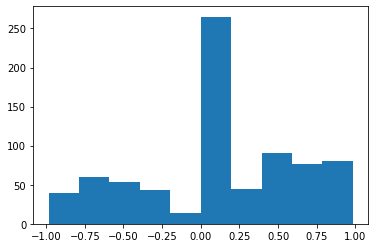

In [94]:
plt.hist(combined.vader_score_emoji)

(array([ 29.,  55.,  54.,  38.,  13., 335.,  40.,  94.,  69.,  40.]),
 array([-9.8430e-01, -7.8752e-01, -5.9074e-01, -3.9396e-01, -1.9718e-01,
        -4.0000e-04,  1.9638e-01,  3.9316e-01,  5.8994e-01,  7.8672e-01,
         9.8350e-01]),
 <BarContainer object of 10 artists>)

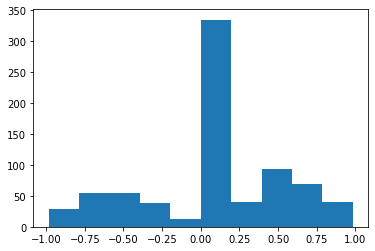

In [95]:
 plt.hist(combined.vader_score_no_emoji)

# Topic Modelling

In [96]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim import corpora

In [97]:
# combined['comment']
tokenised_list = [word_tokenize(text) for text in combined['comment_processed']]
text_lower = [[w.lower() for w in text] for text in tokenised_list]
text_words_only = [[w for w in text if re.search('^[a-z]+$',w)] for text in text_lower]
text_stopremoved = [[w for w in text_words_only if w not in stopwords_list] for text in text_words_only]
# text_stopremoved[:2]

# dictionary = corpora.Dictionary(text_stopremoved)
# print(dictionary)
# print(dictionary.token2id)

TypeError: expected string or bytes-like object

In [18]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in tokenised_list]

NameError: name 'dictionary' is not defined

In [55]:
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.043*"." + 0.037*"!" + 0.026*"the"'), (1, '0.035*"@" + 0.027*"!" + 0.020*"I"'), (2, '0.032*"the" + 0.016*"to" + 0.014*"I"')]
